# ***Installation of Essential Libraries for Machine Learning***

---
This command installs CatBoost, LightGBM, scikit-learn, and matplotlib, which are essential libraries for gradient boosting, machine learning, and data visualization in Python.









In [ ]:
pip install catboost lightgbm scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# ***Loading and Preparing the Dataset***

---
This code loads the dataset from a CSV file, separates the features into X by dropping the target column (isFraud), and assigns the target variable y to the isFraud column.









In [ ]:
# Replace 'your_data.csv' with the path to your dataset file.
data = pd.read_csv('Final_cleaned_preprocessed_DataSet.csv')
X = data.drop(columns='isFraud')  # Assuming 'target' is the label column
y = data['isFraud']


# ***Splitting the Dataset into Training and Testing Sets***

---

This line of code splits the dataset into training and testing sets, with 30% of the data reserved for testing, ensuring reproducibility with a fixed random seed.








In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ***Training the CatBoost Classifier***

---
This code initializes a CatBoostClassifier with specified hyperparameters and trains the model on the training dataset (X_train and y_train).









In [ ]:
catboost_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
catboost_model.fit(X_train, y_train)


# ***Making Predictions and Evaluating the CatBoost Model***

---
This code generates predictions on the test dataset using the trained CatBoost model, calculates the accuracy score, and prints the model's accuracy to eight decimal places.









In [ ]:
catboost_predictions = catboost_model.predict(X_test)
catboost_accuracy = accuracy_score(y_test, catboost_predictions)
print(f"CatBoost Model Accuracy: {catboost_accuracy:.8f}")


CatBoost Model Accuracy: 0.98681006


# ***Training the LightGBM Classifier***

---

This code initializes an LGBMClassifier with defined hyperparameters and trains the model using the training dataset (X_train and y_train).








# ***Training the LightGBM Classifier***

---
This code initializes an LGBMClassifier with specified hyperparameters and trains the model on the training dataset (X_train and y_train).









In [ ]:
lightgbm_model = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
lightgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 5769, number of negative: 5729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 11498, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501739 -> initscore=0.006958
[LightGBM] [Info] Start training from score 0.006958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=6)

# ***Making Predictions and Evaluating the LightGBM Model***

---
This code generates predictions on the test dataset using the trained LightGBM model, calculates the accuracy score, and prints the model's accuracy rounded to two decimal places.









In [ ]:
lightgbm_predictions = lightgbm_model.predict(X_test)
lightgbm_accuracy = accuracy_score(y_test, lightgbm_predictions)
print(f"LightGBM Model Accuracy: {lightgbm_accuracy:.2f}")


LightGBM Model Accuracy: 0.99


# ***Displaying the Confusion Matrix for the CatBoost Model***

---
This code computes the confusion matrix for the CatBoost model's predictions, visualizes it using a heatmap with a blue color map, and displays the confusion matrix with the title "CatBoost Model Confusion Matrix."









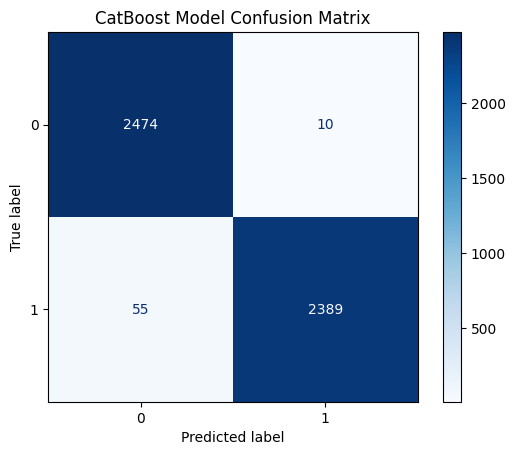

In [ ]:
catboost_cm = confusion_matrix(y_test, catboost_predictions)
ConfusionMatrixDisplay(catboost_cm).plot(cmap='Blues')
plt.title("CatBoost Model Confusion Matrix")
plt.show()


# ***Displaying the Confusion Matrix for the LightGBM Model***

---
This code calculates the confusion matrix for the LightGBM model's predictions, visualizes it using a heatmap with a green color map, and displays the confusion matrix with the title "LightGBM Model Confusion Matrix."









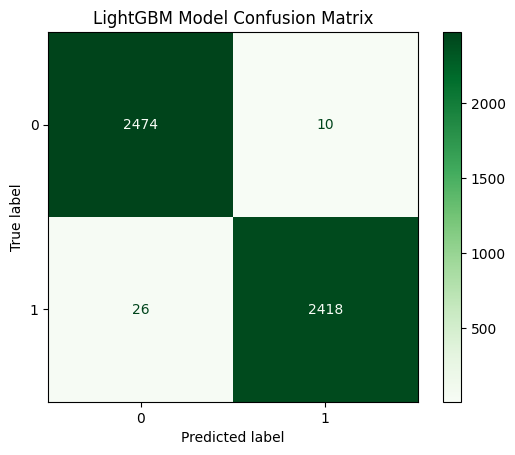

In [ ]:
lightgbm_cm = confusion_matrix(y_test, lightgbm_predictions)
ConfusionMatrixDisplay(lightgbm_cm).plot(cmap='Greens')
plt.title("LightGBM Model Confusion Matrix")
plt.show()


# ***Comparing the Accuracies of the CatBoost and LightGBM Models***

---

This code prints a comparison of the accuracy scores for the CatBoost and LightGBM models, formatted to two decimal places for CatBoost and eight decimal places for LightGBM.








# ***Comparing the Accuracies of the CatBoost and LightGBM Models***

---
This code outputs a formatted comparison of the accuracy scores for the CatBoost and LightGBM models, displaying CatBoost's accuracy to two decimal places and LightGBM's accuracy to eight decimal places.









In [ ]:
print(f"Comparison of Model Accuracies:\nCatBoost: {catboost_accuracy:.2f}\nLightGBM: {lightgbm_accuracy:.8f}")


Comparison of Model Accuracies:
CatBoost: 0.99
LightGBM: 0.99269481


# ***Identifying the Best Model for Fraud Detection***

---
This code determines which model—CatBoost or LightGBM—achieved a higher accuracy in fraud detection and prints a statement indicating the best model based on the comparison.









In [ ]:
best_model = "CatBoost" if catboost_accuracy > lightgbm_accuracy else "LightGBM"
print(f"The best model for fraud detection in this comparison is: {best_model}")


The best model for fraud detection in this comparison is: LightGBM
